In [230]:
#### Dependencies
import pandas as pd
import rasterio
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize,LogNorm
from matplotlib.ticker import LogLocator,LogFormatter
import matplotlib.patches as patches
from matplotlib.collections import PatchCollection
import os
from glob import glob

### Pre-process Energy Import/Export Data

In [231]:
# Define paths
input_folders = {
    "NO3toNO1": "./Input_Data/Raw Data/Energy_Flows/No3toNo1",
    "NO3toNO4": "./Input_Data/Raw Data/Energy_Flows/No3toNo4",
    "NO3toNO5": "./Input_Data/Raw Data/Energy_Flows/No3toNo5",
    "NO3toSE2": "./Input_Data/Raw Data/Energy_Flows/No3toSE2"
}
output_folder = "./Input_Data/Energy"

# Function to process files in a folder and calculate annual imports/exports
def process_energy_flows(folder_path, output_path):
    all_files = glob(os.path.join(folder_path, "*.csv"))
    annual_data = []

    for file in all_files:
        # Read the file
        df = pd.read_csv(file, delimiter=',')

        # Rename columns for consistency
        df.columns = ["Datetime", "Export", "Import"]

        # Parse datetime and extract year
        df["Datetime"] = pd.to_datetime(df["Datetime"].str.split(" - ").str[0], format="%d.%m.%Y %H:%M")
        df["Year"] = df["Datetime"].dt.year

        # Convert Export and Import columns to numeric, handling invalid values
        df["Export"] = pd.to_numeric(df["Export"], errors="coerce").fillna(0)
        df["Import"] = pd.to_numeric(df["Import"], errors="coerce").fillna(0)

        # Aggregate by year
        yearly_summary = df.groupby("Year")["Export", "Import"].sum().reset_index()
        annual_data.append(yearly_summary)

    # Combine all yearly summaries
    combined_data = pd.concat(annual_data).groupby("Year").sum().reset_index()

    # Save the annual data to the respective folder
    output_file = os.path.join(output_path, "Annual_Flows.csv")
    combined_data.to_csv(output_file, index=False)
    print(f"Annual data saved to {output_file}")

    return combined_data

# Process each folder
all_annual_data = []
for district, folder in input_folders.items():
    print(f"Processing folder: {folder}")
    district_output_path = os.path.join(folder, "Annual_Summary")
    os.makedirs(district_output_path, exist_ok=True)

    # Process and save annual data for the district
    district_data = process_energy_flows(folder, district_output_path)
    district_data["District"] = district  # Add district info
    all_annual_data.append(district_data)

# Combine data for all districts and calculate total imports/exports
final_data = pd.concat(all_annual_data).groupby("Year")["Export", "Import"].sum().reset_index()

# Save the final summary
final_output_file = os.path.join(output_folder, "Total_Annual_Imports_Exports.csv")
os.makedirs(output_folder, exist_ok=True)
final_data.to_csv(final_output_file, index=False)
print(f"Total annual imports/exports saved to {final_output_file}")


Processing folder: ./Input_Data/Raw Data/Energy_Flows/No3toNo1


C:\Users\zvirk20\AppData\Local\Temp\ipykernel_104024\536557126.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  yearly_summary = df.groupby("Year")["Export", "Import"].sum().reset_index()
C:\Users\zvirk20\AppData\Local\Temp\ipykernel_104024\536557126.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  yearly_summary = df.groupby("Year")["Export", "Import"].sum().reset_index()
C:\Users\zvirk20\AppData\Local\Temp\ipykernel_104024\536557126.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  yearly_summary = df.groupby("Year")["Export", "Import"].sum().reset_index()
C:\Users\zvirk20\AppData\Local\Temp\ipykernel_104024\536557126.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a 

Annual data saved to ./Input_Data/Raw Data/Energy_Flows/No3toNo1\Annual_Summary\Annual_Flows.csv
Processing folder: ./Input_Data/Raw Data/Energy_Flows/No3toNo4


C:\Users\zvirk20\AppData\Local\Temp\ipykernel_104024\536557126.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  yearly_summary = df.groupby("Year")["Export", "Import"].sum().reset_index()
C:\Users\zvirk20\AppData\Local\Temp\ipykernel_104024\536557126.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  yearly_summary = df.groupby("Year")["Export", "Import"].sum().reset_index()
C:\Users\zvirk20\AppData\Local\Temp\ipykernel_104024\536557126.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  yearly_summary = df.groupby("Year")["Export", "Import"].sum().reset_index()
C:\Users\zvirk20\AppData\Local\Temp\ipykernel_104024\536557126.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a 

Annual data saved to ./Input_Data/Raw Data/Energy_Flows/No3toNo4\Annual_Summary\Annual_Flows.csv
Processing folder: ./Input_Data/Raw Data/Energy_Flows/No3toNo5


C:\Users\zvirk20\AppData\Local\Temp\ipykernel_104024\536557126.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  yearly_summary = df.groupby("Year")["Export", "Import"].sum().reset_index()
C:\Users\zvirk20\AppData\Local\Temp\ipykernel_104024\536557126.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  yearly_summary = df.groupby("Year")["Export", "Import"].sum().reset_index()
C:\Users\zvirk20\AppData\Local\Temp\ipykernel_104024\536557126.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  yearly_summary = df.groupby("Year")["Export", "Import"].sum().reset_index()
C:\Users\zvirk20\AppData\Local\Temp\ipykernel_104024\536557126.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a 

Annual data saved to ./Input_Data/Raw Data/Energy_Flows/No3toNo5\Annual_Summary\Annual_Flows.csv
Processing folder: ./Input_Data/Raw Data/Energy_Flows/No3toSE2


C:\Users\zvirk20\AppData\Local\Temp\ipykernel_104024\536557126.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  yearly_summary = df.groupby("Year")["Export", "Import"].sum().reset_index()
C:\Users\zvirk20\AppData\Local\Temp\ipykernel_104024\536557126.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  yearly_summary = df.groupby("Year")["Export", "Import"].sum().reset_index()
C:\Users\zvirk20\AppData\Local\Temp\ipykernel_104024\536557126.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  yearly_summary = df.groupby("Year")["Export", "Import"].sum().reset_index()
C:\Users\zvirk20\AppData\Local\Temp\ipykernel_104024\536557126.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a 

Annual data saved to ./Input_Data/Raw Data/Energy_Flows/No3toSE2\Annual_Summary\Annual_Flows.csv
Total annual imports/exports saved to ./Input_Data/Energy\Total_Annual_Imports_Exports.csv


C:\Users\zvirk20\AppData\Local\Temp\ipykernel_104024\536557126.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  yearly_summary = df.groupby("Year")["Export", "Import"].sum().reset_index()
C:\Users\zvirk20\AppData\Local\Temp\ipykernel_104024\536557126.py:57: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  final_data = pd.concat(all_annual_data).groupby("Year")["Export", "Import"].sum().reset_index()


#### Pre-process_Reservoir Volume Data

In [35]:
#### Function to Process Reservoir Volumes
## Takes inputs as raw timeseries in CSV files, interpolates missing values and returns a merged csv
## which is used for further calculations
# Function to Process Reservoir Volumes
def process_and_merge_data(file_paths, start_year, end_year, output_file):
    data_frames = []

    for name, path in file_paths.items():
        # Read each file
        df = pd.read_csv(path)
        
        # Extract year, month, and day from the "Time" column
        df['Time'] = pd.to_datetime(df['Time'])
        df['Year'] = df['Time'].dt.year
        df['Month'] = df['Time'].dt.month
        df['Day'] = df['Time'].dt.day
        
        # Clip data based on year range
        df = df[(df['Year'] >= start_year) & (df['Year'] <= end_year)]
        
        # Add Julian day column
        df['Julian_Day'] = df['Time'].dt.dayofyear
        
        # Rename the volume column to file name (assume second column is volume)
        volume_col = df.columns[1]
        df.rename(columns={volume_col: name}, inplace=True)
        
        # Convert volume column to cubic meters (from million m³) since we have this conversion applied separtely in different 
        # cells we don't need it here.
        #df[name] = df[name] * 1e6

        # Keep relevant columns
        data_frames.append(df[['Year', 'Month', 'Day', 'Julian_Day', name]])

    # Merge all data on Year, Month, Day, and Julian_Day
    merged_data = data_frames[0]
    for df in data_frames[1:]:
        merged_data = pd.merge(merged_data, df, on=['Year', 'Month', 'Day', 'Julian_Day'], how='outer')

    # Interpolate missing values
    merged_data.interpolate(method='linear', inplace=True, limit_direction='both')

    # Save the final merged and processed data
    merged_data.to_csv(output_file, index=False)  

    print(f"Processed data saved to {output_file}")
    return output_file

# Input data and file paths
file_paths = {
    "Aursojen": "./Input_Data/Raw Data/Volumes/Aursojen_volume(1966-2020).csv",
    "Breidalsvatnet": "./Input_Data/Raw Data/Volumes/Breidalsvatnet_volume(1960-2020).csv",
    "Rauddalsvatnet": "./Input_Data/Raw Data/Volumes/Rauddalsvatnet_volume(1960-2020).csv",
    "Tesse": "./Input_Data/Raw Data/Volumes/Tesse_volume(1960-2020).csv"
}

output_file = "./Input_Data/Water/Reservoir_Volumes.csv"
start_year = 2000
end_year = 2020

process_and_merge_data(file_paths, start_year, end_year, output_file)

Processed data saved to ./Input_Data/Water/Reservoir_Volumes_new.csv


'./Input_Data/Water/Reservoir_Volumes_new.csv'

### Energy Storage

In [217]:
# Input and Output Paths
volume_data_file = "./Input_Data/Water/Reservoir_Volumes_new.csv"
energy_data_file = "./Input_Data/Energy/Energy_Scape.xlsx"

# Output file paths
output_mean_annual = "./Outputs/Energy/Total_Annual_Storage.csv"
output_cell_grid = "./Outputs/Energy/Mean_Storage_Per_Cell.csv"
storage_output_file = "./Outputs/Energy/energy_storage_data.csv"


def energy_storage(volume_data_file, energy_data_file, storage_output_file):
    # Read volume data
    volume_data = pd.read_csv(volume_data_file)
    
    # Convert column names from index 4 onwards to integers
    def clean_column_name(col):
        try:
            return int(float(col))  # Convert to float first, then to int
        except ValueError:
            return col  # Return the original name if it can't be converted

    volume_data.rename(columns={col: clean_column_name(col) for col in volume_data.columns[4:]}, inplace=True)

    # Read storage data
    storage_data = pd.read_excel(energy_data_file, sheet_name="Storage")
    
    # Initialize the energy_storage_data DataFrame with date-related columns
    energy_storage_data = volume_data[['Year', 'Month', 'Day', 'Julian_Day']].copy()

    # Loop through each reservoir and calculate Hold_Energy
    for _, row in storage_data.iterrows():
        reservoir = row["Res_Id"]
        hold_start = row["Hold_Start"]
        hold_end = row["Hold_End"]
        height = row["Height"]

        if reservoir in volume_data.columns:
            # Split hold period
            volume_data[f'{reservoir}_Hold'] = volume_data.apply(
                lambda r: r[reservoir] if hold_start <= r['Julian_Day'] <= hold_end else 0, axis=1
            )

            # Calculate hold energy
            energy_storage_data[f'{reservoir}_Hold_Energy'] = (
                volume_data[f'{reservoir}_Hold'] * 998 * 9.8 * height * (2.778 * 1e-13)  # Convert energy to GWh
            )
        else:
            print(f"Warning: Reservoir {reservoir} not found in volume data.")

    # Save to file
    energy_storage_data.to_csv(storage_output_file, index=False)
    print(f"Energy storage data saved to {storage_output_file}.")

    return energy_storage_data

# Calculate energy storage by calling above function (energy_storage)
final_storage_data = energy_storage(volume_data_file, energy_data_file, storage_output_file)

# Calculate Mean Annual storage
annual_storage = final_storage_data.groupby('Year').sum(numeric_only=True)
annual_storage.to_csv(output_mean_annual)
print(f"Mean annual storage saved to: {output_mean_annual}")

# Step 3: Read Cell_IDs and source mapping from the Storage sheet
cell_mapping = pd.read_excel(energy_data_file, sheet_name="Storage")

# Initialize grid cells (1 to 9440)
num_cells = 9440
cell_grid = pd.DataFrame({"Cell_ID": range(1, num_cells + 1)})

# Calculate mean stored energy for each reservoir
source_totals = annual_storage.iloc[:, 3:].mean(numeric_only=True)

# Initialize a column for the total sum of all reservoirs
cell_grid["Total_Storage"] = 0  # This will store the sum of energy values for each Cell_ID

# Map mean stored energy to grid cells for storage
for _, row in cell_mapping.iterrows():
    reservoir_with_suffix = f"{row['Res_Id']}_Hold_Energy"  # Match the column name in storage data
    if reservoir_with_suffix in source_totals.index:
        # Get the list of Cell_IDs
        cell_ids = row["Cell_ID"]
        if isinstance(cell_ids, str):
            # Convert string representation of list to actual list
            cell_ids = eval(cell_ids)  # Use eval carefully; it assumes the input is properly formatted

        # Calculate the mean stored energy for this reservoir
        mean_energy = source_totals[reservoir_with_suffix] / len(cell_ids)

        # Distribute the energy equally among the cells and add to total storage
        for cell_id in cell_ids:
            cell_grid.loc[cell_grid["Cell_ID"] == cell_id, "Total_Storage"] += mean_energy
    else:
        print(f"Warning: Source '{reservoir_with_suffix}' not found in source_totals.")

# Fill NaN values with 0 (just in case)
cell_grid.fillna(0, inplace=True)

# Save grid-based storage data
cell_grid.to_csv(output_cell_grid, index=False)
print(f"Storage per cell saved to: {output_cell_grid}")

Energy storage data saved to ./Outputs/Energy/energy_storage_data.csv.
Mean annual storage saved to: ./Outputs/Energy/Total_Annual_Storage.csv
Storage per cell saved to: ./Outputs/Energy/Mean_Storage_Per_Cell.csv


In [218]:
# Calculate the mean of columns starting from the 5th column
#source_totals = annual_storage.iloc[:, 3:].mean(numeric_only=True)
print(source_totals)

1_Hold_Energy    299.920969
2_Hold_Energy    334.307114
4_Hold_Energy    184.318736
5_Hold_Energy    180.040450
dtype: float64


#### Energy Production

In [196]:
# Input File Paths
volume_data_file = "./Input_Data/Water/Reservoir_Volumes.csv"
energy_data_file = "./Input_Data/Energy/Energy_Scape.xlsx"
production_data = pd.read_excel(energy_data_file, sheet_name="Production")
storage_data = pd.read_excel(energy_data_file, sheet_name="Storage")

# Output File Paths
production_output_file = "./Outputs/Energy/daily_energy_production_data.csv"

# Function for Daily Energy Production
def energy_production(volume_data_file, production_data, storage_data):
    # Read the reservoir volume data
    volume_data = pd.read_csv(volume_data_file)
    
    # Convert volume columns to cubic meters (from million m³)
    for col in volume_data.columns[4:]:  # Assuming first 4 columns are 'Year', 'Month', 'Day', 'Julian_Day'
        volume_data[col] *= 1e6 ####Convert in m3

    # Initialize a DataFrame to store energy production data
    energy_production_data = volume_data[['Year', 'Month', 'Day', 'Julian_Day']].copy()

    for _, row in production_data.iterrows():
        HPP = row["Name"]
        energy_equivalent = row["EEQ"]
        reservoir = str(row["Res_Id"])  # Match reservoir column names as strings

        if reservoir in map(str, range(1, 6)):  # Res_Id in range 1 to 5
            storage_row = storage_data[storage_data["Res_Id"] == int(reservoir)]
            if not storage_row.empty:
                hold_start, hold_end = storage_row.iloc[0]["Hold_Start"], storage_row.iloc[0]["Hold_End"]
            else:
                print(f"Hold_Start and Hold_End not found for Reservoir {reservoir}. Skipping...")
                continue

            if reservoir in volume_data.columns:
                # Calculate hold and release periods
                volume_data[f'{reservoir}_Hold'] = volume_data.apply(
                    lambda r: r[reservoir] if hold_start <= r['Julian_Day'] <= hold_end else 0, axis=1
                )
                volume_data[f'{reservoir}_Release'] = volume_data[reservoir] - volume_data[f'{reservoir}_Hold']

                # Calculate daily production
                volume_data[f'{HPP}_Daily_Flow'] = volume_data[f'{reservoir}_Release'].diff().fillna(0).abs()
                volume_data[f'{HPP}_Daily_Production'] = (volume_data[f'{HPP}_Daily_Flow'] * energy_equivalent* row["Efficiency"] * 0.75) / 1e6 # Conversion from KW/m3 to GW/m3
            else:
                print(f"Reservoir {reservoir} not found in volume_data columns. Skipping...")
                continue
        elif reservoir == '0':  # Res_Id is 0
            # Direct production calculation for non-reservoir HPPs
            volume_data[f'{HPP}_Daily_Production'] = (row["Capacity"] * row["Efficiency"] * 0.5 * 24) / 1e3 ##Assuming Daily production to be 50% of total capacity + conversion from MW to GW
        else:
            print(f"Invalid Res_Id value: {reservoir}. Skipping...")
            continue

        # Append only the Daily_Production column for the current HPP
        energy_production_data[f'{HPP}_Daily_Production'] = volume_data[f'{HPP}_Daily_Production']

    # Return the final DataFrame
    print("Energy production data processing completed.")
    return energy_production_data

# Call the energy production function
final_data = energy_production(volume_data_file, production_data, storage_data)

# Save the daily production data
final_data.to_csv(production_output_file, index=False)
print(f"Energy production data saved to {production_output_file}.")


Energy production data processing completed.
Energy production data saved to ./Outputs/Energy/daily_energy_production_data.csv.


In [197]:
# Aggregation of Production Data
###Output Paths
output_total_annual = "./Outputs/Energy/total_annual_production.csv"
output_cell_grid = "./Outputs/Energy/mean_annual_production_per_cell.csv"


# Calculate total annual production
annual_production = final_data.groupby('Year').sum(numeric_only=True)
annual_production['Total_Production'] = annual_production.iloc[:, 4:].sum(axis=1)
annual_production.to_csv(output_total_annual)
print(f"Total annual production saved to: {output_total_annual}")

# Read Cell_IDs and source mapping from the Production sheet
cell_mapping = production_data

# Initialize grid cells (1 to 9440)
num_cells = 9440
cell_grid = pd.DataFrame({"Cell_ID": range(1, num_cells + 1)})

# Calculate total production for each source
production_columns = final_data.iloc[:, 4:]  # This selects all columns starting from column 4
# Add the 'Year' column for grouping
production_data = final_data[['Year']].join(production_columns)
# Group by 'Year' and sum for each year
tot_prod = production_data.groupby('Year').sum()
# Calculate the mean of all years for each production source
source_totals = tot_prod.mean(numeric_only=True)

# Map total production to grid cells
for source in cell_mapping["Name"]:
    # Add the suffix "_Daily_Production" to match source_totals
    source_with_suffix = f"{source}_Daily_Production"
    if source_with_suffix in source_totals.index:
        # Find the corresponding Cell_ID
        cell_id = cell_mapping.loc[cell_mapping["Name"] == source, "Cell_ID"].values
        if len(cell_id) > 0:
            cell_id = cell_id[0]  # Extract the first (and only) Cell_ID
            cell_grid.loc[cell_grid["Cell_ID"] == cell_id, source] = source_totals[source_with_suffix]
        else:
            print(f"Warning: Cell_ID not found for source '{source}'")
    else:
        print(f"Warning: Source '{source_with_suffix}' not found in source_totals")

# Fill NaN values with 0
cell_grid.fillna(0, inplace=True)
cell_grid['Mean_Annual_Production'] = cell_grid.iloc[:, 2:].sum(axis=1)

# Save grid-based production data
cell_grid.to_csv(output_cell_grid, index=False)
print(f"Production per cell saved to: {output_cell_grid}")


Total annual production saved to: ./Outputs/Energy/total_annual_production.csv
Production per cell saved to: ./Outputs/Energy/mean_annual_production_per_cell.csv


#### Population Estimation

In [5]:
# Load population data from a CSV file and calculate growth rates
population_csv = ".\Input_Data\Pop\Pop.csv"  # Path to your CSV file
population_data = pd.read_csv(population_csv)

# Ensure the population data is sorted by year
population_data = population_data.sort_values(by="Year", ascending=True)

# Calculate growth rates as year-over-year percentage changes
population_data["Growth_Rate"] = population_data["Population"].pct_change()

# Convert growth rates to a dictionary for easy access
growth_rates = population_data.set_index("Year")["Growth_Rate"].to_dict()

# Load the population raster for 2024
input_raster = ".\Input_Data\Pop\Otta_Pop_2024.tif"  # Path to the 2024 population raster

# Read the 2024 raster
with rasterio.open(input_raster) as src:
    population_2024 = src.read(1)  # Read the first band
    profile = src.profile  # Get metadata for saving rasters
    rows, cols = population_2024.shape

# Step 3: Back-calculate population rasters and save in a DataFrame
population_df = pd.DataFrame(index=range(rows * cols))

# Flatten the 2024 population raster to a column in the DataFrame
population_df["2024"] = population_2024.flatten()

# Back-calculate population for each year
current_population = population_2024.flatten()  # Start with the 2024 population
for year in range(2024, population_data["Year"].min(), -1):
    if year - 1 in growth_rates:  # Ensure growth rate exists for the year
        growth_rate = growth_rates[year - 1]  # Growth rate for the previous year
        previous_population = current_population / (1 + growth_rate)  # Back-calculate population
        population_df[str(year - 1)] = previous_population
        current_population = previous_population  # Update for the next iteration

# Step 4: Reshape population data for each year
population_df.index.name = "Cell_ID"
population_df.reset_index(inplace=True)

# Save the population DataFrame to a CSV file for future use
output_csv = ".\Outputs\Pop\Tot_Pop.csv"
population_df.to_csv(output_csv, index=False)
print(f"Population data for all years saved to {output_csv}.")


Population data for all years saved to .\Outputs\Pop\Tot_Pop.csv.


##### Energy Consumption

In [84]:
# Paths to input files
population_csv = "./Outputs/Pop/Tot_Pop.csv"  # Population data
residences_raster = "./Input_Data/Pop/Otta_Dwell_2024.tif"
business_raster = "./Input_Data/Pop/Otta_Estab_2024.tif"
agriculture_raster = "./Input_Data/Pop/Otta_Ag_Prop.tif"
forest_raster = "./Input_Data/Pop/Otta_For_Prop.tif"

# Output files
output_residential = "./Outputs/Energy/residential_consumption.csv"
output_business = "./Outputs/Energy/business_consumption.csv"
output_agriculture = "./Outputs/Energy/agriculture_consumption.csv"
output_forest = "./Outputs/Energy/forest_consumption.csv"
output_total = "./Outputs/Energy/total_consumption.csv"
total_annual_consumption_file = "./Outputs/Energy/Total_Annual_Consumption.csv"
mean_con_per_cell = "./Outputs/Energy/Mean_Consumption_Per_Cell.csv"


# Energy consumption parameters (base year 2024, kWh/day)
E_res_base = (20*365)/1e6  # Per-capita residential energy consumption + conversion to GWH
E_bus_base = (40*365)/1e6  # Energy per business property + conversion to GWH
E_agr_base = (40*365)/1e6  # Energy per agricultural property + conversion to GWH
E_for_base = (15*365)/1e6  # Energy per forest property + conversion to GWH

# Load population data
population_data = pd.read_csv(population_csv, index_col="Cell_ID")
population_data.columns = population_data.columns.astype(int)  # Ensure year columns are integers

# Extract years from the population data
years = population_data.columns

# Read raster data as numpy arrays and align with population_data indices
with rasterio.open(residences_raster) as res_src, \
     rasterio.open(business_raster) as bus_src, \
     rasterio.open(agriculture_raster) as agr_src, \
     rasterio.open(forest_raster) as for_src:
    
    # Read raster data as 2D arrays
    residences = res_src.read(1)
    businesses = bus_src.read(1)
    agriculture = agr_src.read(1)
    forest = for_src.read(1)
    
    # Flatten rasters to 1D arrays for processing
    residences_flat = residences.flatten()
    businesses_flat = businesses.flatten()
    agriculture_flat = agriculture.flatten()
    forest_flat = forest.flatten()

    # Map raster indices to population Cell_ID
    cell_ids = np.arange(len(residences_flat))  # Assume a direct mapping of raster cells to Cell_IDs

# Initialize DataFrames for each type of consumption
residential_consumption = pd.DataFrame(index=population_data.index, columns=years)
business_consumption = pd.DataFrame(index=population_data.index, columns=years)
agriculture_consumption = pd.DataFrame(index=population_data.index, columns=years)
forest_consumption = pd.DataFrame(index=population_data.index, columns=years)
total_consumption = pd.DataFrame(index=population_data.index, columns=years)

# Base year population for scaling
P_base = population_data[2024]

# Loop through each year and calculate consumption
for year in years:
    scaling_factor = population_data[year] / P_base  # Scaling factor for property consumption

    # Calculate consumption for each type
    residential_consumption[year] = population_data[year] * E_res_base
    business_consumption[year] = businesses_flat * E_bus_base * scaling_factor.values
    agriculture_consumption[year] = agriculture_flat * E_agr_base * scaling_factor.values
    forest_consumption[year] = forest_flat * E_for_base * scaling_factor.values

    # Calculate total consumption
    total_consumption[year] = (
        residential_consumption[year] +
        business_consumption[year] +
        agriculture_consumption[year] +
        forest_consumption[year]
    )
total_consumption.columns = total_consumption.columns.astype(str)   


#### Mean Consumption per cell from 2000 to 2020
columns_to_average = [str(year) for year in range(2000, 2021)]
# Calculate the mean consumption for each cell from 2000 to 2020
total_consumption['Mean_Consumption'] = total_consumption[columns_to_average].mean(axis=1)
total_consumption.reset_index(inplace=True)
mean_con = total_consumption[['Cell_ID', 'Mean_Consumption']]

#### Total Annual Consumption

# Define the year range for summation
# Calculate the total consumption for each year
annual_sum = total_consumption[columns_to_average].sum().reset_index()
# Rename the columns
annual_sum.columns = ['Year', 'Total_Consumption']


    
    
# Save outputs to CSV
residential_consumption.to_csv(output_residential)
business_consumption.to_csv(output_business)
agriculture_consumption.to_csv(output_agriculture)
forest_consumption.to_csv(output_forest)
total_consumption.to_csv(output_total)
mean_con.to_csv(mean_con_per_cell, index=False)
annual_sum.to_csv(total_annual_consumption_file, index=False)

print("Energy consumption CSV files generated:")
print(f"- Residential: {output_residential}")
print(f"- Business: {output_business}")
print(f"- Agriculture: {output_agriculture}")
print(f"- Forest: {output_forest}")
print(f"- Total: {output_total}")
print(f"Mean consumption per cell saved to: {mean_con_per_cell}")
print(f"Total annual consumption saved to: {total_annual_consumption_file}")

Energy consumption CSV files generated:
- Residential: ./Outputs/Energy/residential_consumption.csv
- Business: ./Outputs/Energy/business_consumption.csv
- Agriculture: ./Outputs/Energy/agriculture_consumption.csv
- Forest: ./Outputs/Energy/forest_consumption.csv
- Total: ./Outputs/Energy/total_consumption.csv
Mean consumption per cell saved to: ./Outputs/Energy/Mean_Consumption_Per_Cell.csv
Total annual consumption saved to: ./Outputs/Energy/Total_Annual_Consumption.csv


### Annual Balance

In [236]:
# File paths
energy_data_file = "./Input_Data/Energy/Energy_Scape.xlsx"
total_annual_production_file = "./Outputs/Energy/Total_Annual_Production.csv"
mean_annual_storage_file = "./Outputs/Energy/Total_Annual_Storage.csv"
total_consumption_file = "./Outputs/Energy/Total_Annual_Consumption.csv"
annual_balance_output_file = "./Outputs/Energy/Annual_Balance.csv"

# Read data
import_data = pd.read_excel(energy_data_file, sheet_name="Import")
export_data = pd.read_excel(energy_data_file, sheet_name="Export")
annual_production = pd.read_csv(total_annual_production_file)
mean_storage = pd.read_csv(mean_annual_storage_file)
total_consumption = pd.read_csv(total_consumption_file)

# Filter years from 2000 to 2020
years = range(2000, 2021)

# Initialize the annual balance DataFrame
annual_balance = pd.DataFrame({"Year": years})

# Process consumption data
#total_consumption["Total_Consumption"] = total_consumption.iloc[:, 1:].sum(axis=1)  # Sum across rows (cells)
#annual_consumption = total_consumption.iloc[:, 1:].sum(axis=0).reset_index()  # Sum across years (columns)
#annual_consumption.columns = ["Year", "Total_Consumption"]
# Filter to ensure "Year" contains only numeric values
#annual_consumption = annual_consumption[annual_consumption["Year"].str.isdigit()]
#annual_consumption["Year"] = annual_consumption["Year"].astype(int)  # Convert to integers
# Filter the data for the desired years
#annual_consumption_filtered = annual_consumption[annual_consumption["Year"].isin(years)]

# Merge with the annual balance DataFrame
annual_balance = annual_balance.merge(total_consumption, on="Year", how="left")
annual_balance.rename(columns={"Total_Consumption": "Consumption"}, inplace=True)


# Process import data
import_data_filtered = import_data[import_data["Year"].isin(years)]
annual_balance = annual_balance.merge(import_data_filtered, on="Year", how="left")
annual_balance.rename(columns={"Energy_Import(GWH)": "Import"}, inplace=True)


# Process export data
export_data_filtered = export_data[export_data["Year"].isin(years)]
annual_balance = annual_balance.merge(export_data_filtered, on="Year", how="left")
annual_balance.rename(columns={"Energy_Export(GWH)": "Export"}, inplace=True)

# Process production data
#annual_production["Total_Production"] = annual_production.iloc[:, 1:].sum(axis=1)
annual_production_filtered = annual_production[annual_production["Year"].isin(years)][["Year", "Total_Production"]]
annual_balance = annual_balance.merge(annual_production_filtered, on="Year", how="left")
annual_balance.rename(columns={"Total_Production": "Production"}, inplace=True)

# Process storage data
mean_storage["Total_Storage"] = mean_storage.iloc[:, 4:].sum(axis=1)
mean_storage_filtered = mean_storage[mean_storage["Year"].isin(years)][["Year", "Total_Storage"]]
annual_balance = annual_balance.merge(mean_storage_filtered, on="Year", how="left")
annual_balance.rename(columns={"Total_Storage": "Storage"}, inplace=True)



# Save to CSV
annual_balance.to_csv(annual_balance_output_file, index=False)

print(f"Annual balance data saved to: {annual_balance_output_file}")

Annual balance data saved to: ./Outputs/Energy/Annual_Balance.csv


### Results Plotting

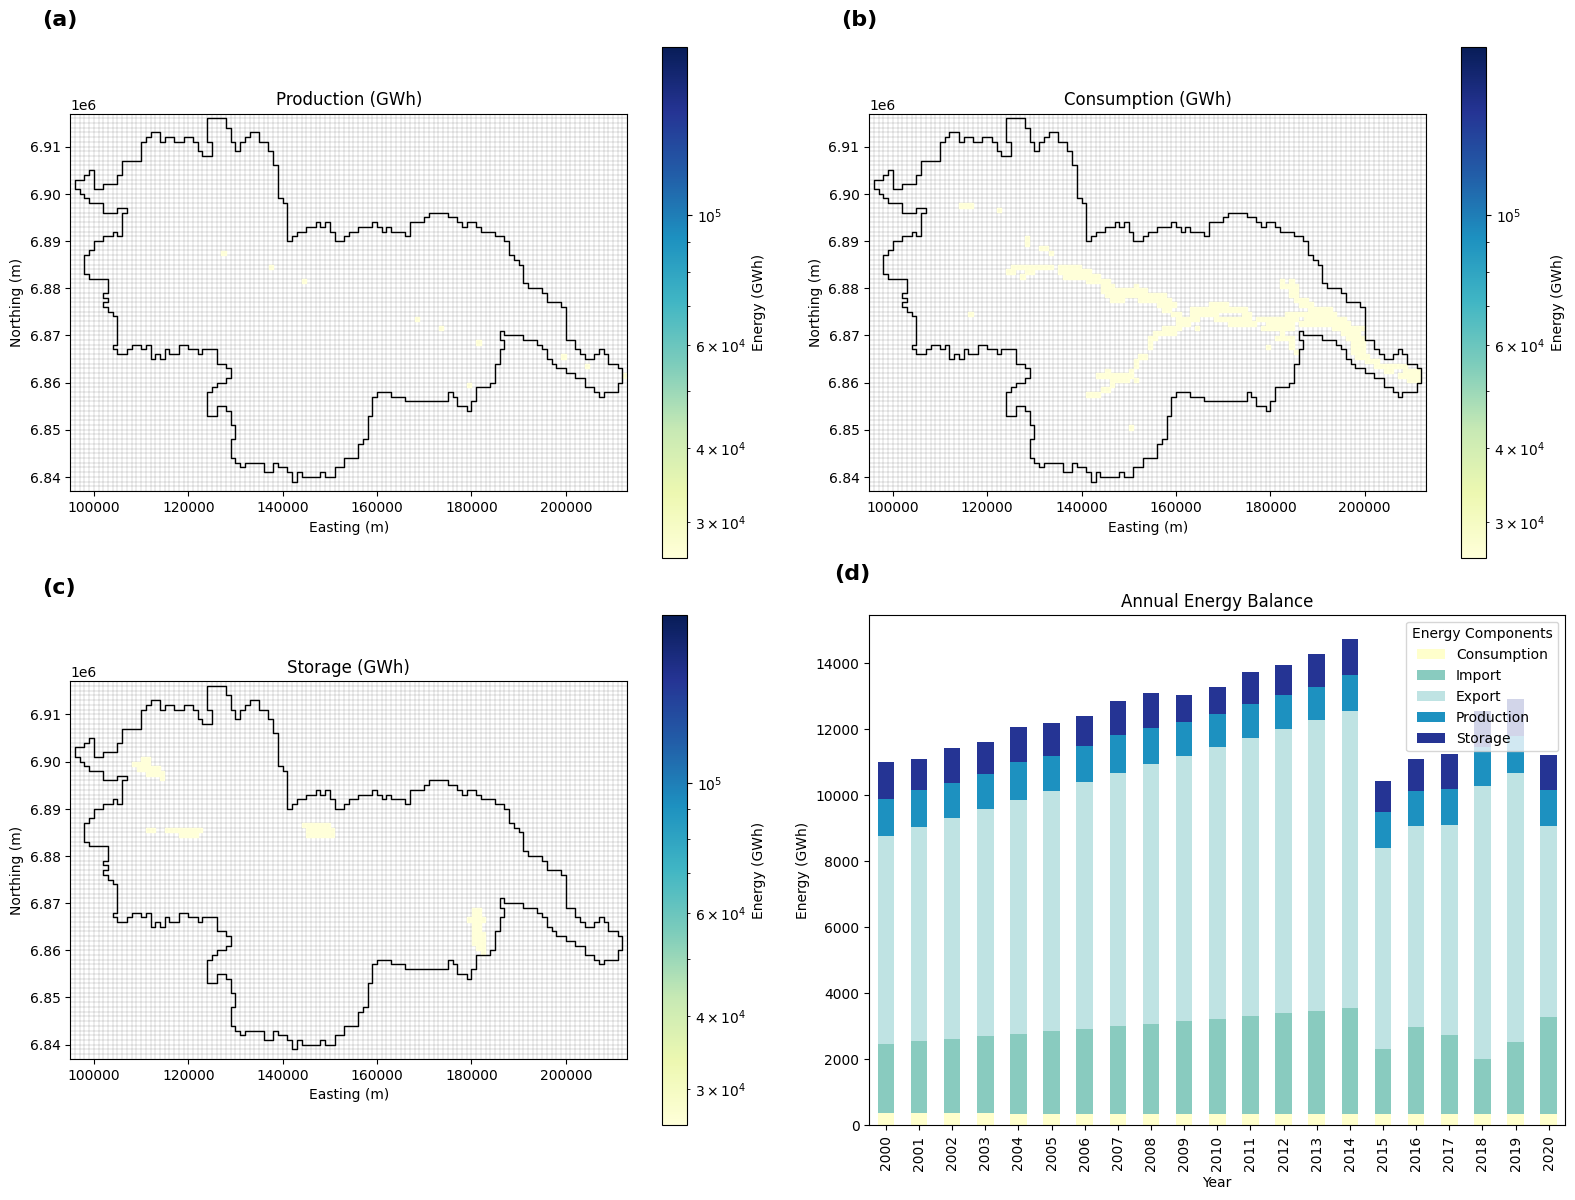

In [235]:
###Final Plot
# Input file paths
grid_consumption_file = "./Outputs/Energy/Mean_Consumption_Per_Cell.csv"
grid_production_file = "./Outputs/Energy/mean_annual_production_per_cell.csv"
grid_storage_file = "./Outputs/Energy/Mean_Storage_Per_Cell.csv"
boundary_shapefile = "./Input_Data/maps/mask/Otta_mask.shp"
annual_balance_file = "./Outputs/Energy/Annual_Balance.csv"

# CRS and extent
crs = "EPSG:25833"
extent = [95000, 6837000, 213000, 6917000]
cell_size = 1000

# Grid data
grid_consumption = pd.read_csv(grid_consumption_file, usecols=["Cell_ID", "Mean_Consumption"])
grid_production = pd.read_csv(grid_production_file, usecols=["Cell_ID", "Mean_Annual_Production"])
grid_storage = pd.read_csv(grid_storage_file, usecols=["Cell_ID", "Total_Storage"])

# Mask shapefile
boundary = gpd.read_file(boundary_shapefile).to_crs(crs)

# Annual balance data
annual_balance = pd.read_csv(annual_balance_file)

# Grid geometry
n_cols = int((extent[2] - extent[0]) / cell_size)
n_rows = int((extent[3] - extent[1]) / cell_size)
grid_x, grid_y = np.meshgrid(
    np.linspace(extent[0] + cell_size / 2, extent[2] - cell_size / 2, n_cols),
    np.linspace(extent[3] - cell_size / 2, extent[1] + cell_size / 2, n_rows),
)
grid_cells = pd.DataFrame({
    "Cell_ID": range(1, n_cols * n_rows + 1),
    "X": grid_x.flatten(),
    "Y": grid_y.flatten(),
})

# Merge grid data with Cell_ID
consumption_grid = grid_cells.merge(grid_consumption, on="Cell_ID", how="left")
production_grid = grid_cells.merge(grid_production, on="Cell_ID", how="left")
storage_grid = grid_cells.merge(grid_storage, on="Cell_ID", how="left")

# Merged Data
consumption_grid["Mean_Consumption"] = consumption_grid["Mean_Consumption"].fillna(0)
production_grid["Mean_Annual_Production"] = production_grid["Mean_Annual_Production"].fillna(0)
storage_grid["Total_Storage"] = storage_grid["Total_Storage"].fillna(0)

# Plot settings
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))
titles = ["Production (GWh)", "Consumption (GWh)", "Storage (GWh)", "Annual Balance"]
data_grids = [
    (production_grid, "Mean_Annual_Production"),
    (consumption_grid, "Mean_Consumption"),
    (storage_grid, "Total_Storage")
]

# Define column names and their corresponding colors
column_color_map = {
    'Consumption': '#FFFFCC',  # Light Yellow
    'Import': '#89cbbf',             # Light Teal
    'Export': '#BFE3E3',             # Aqua Blue
    'Production': '#1D91C0',   # Medium Blue
    'Storage': '#253494'       # Dark Blue
}
#manual_ranges = [
   #{"vmin": 1e0, "vmax": 2e2, "ticks": [1e0, 1e1, 1e2, 2e2]},  # Subplot (a): Production
    #{"vmin": 1e0, "vmax": 1e1, "ticks": [1e0, 2e0,3e0,4e0, 6e0, 8e0, 1e1]},       # Subplot (b): Consumption
    #{"vmin": 1e0, "vmax": 5e5, "ticks": [1e0, 1e1, 1e2, 1e3, 1e4, 5e5]}  # Subplot (c): Storage
#]

# Custom function to handle tick formatting
#def format_ticks(tick):
    #if tick == 0:
     #   return "0"
    #else:
    #    return f"${{10^{int(np.log10(tick))}}}$"

# Reorder the colors to match datafram columns
stacked_colors = [column_color_map[col] for col in annual_balance.columns if col != 'Year']
# Panel labels
panel_labels = ['(a)', '(b)', '(c)', '(d)']
# Grid settings (extent and size)
cell_size = 1000  # Grid cell size
grid_color = 'gray'  # Grid line color
grid_linewidth = 0.10  # Grid line thickness

# Function to add grid overlay
def add_grid_overlay(ax, grid_cells, cell_size):
    for _, row in grid_cells.iterrows():
        rect = patches.Rectangle(
            (row["X"] - cell_size / 2, row["Y"] - cell_size / 2),  # Bottom-left corner
            cell_size, cell_size,  # Width and height
            linewidth=grid_linewidth, edgecolor=grid_color, facecolor='none'
        )
        ax.add_patch(rect)


for i, (ax, (data_grid, col)) in enumerate(zip(axes.flat[:3], data_grids)):
    # Filter positive values
    #positive_values = data_grid[col][data_grid[col] > 0]
    # Apply LogNorm 
    #if not positive_values.empty:
    norm = LogNorm(vmin=max(positive_values.min(), 1), vmax=positive_values.quantile(0.99))
        
    #norm = LogNorm(vmin=manual_ranges[i]["vmin"], vmax=manual_ranges[i]["vmax"])
    add_grid_overlay(ax, data_grid, cell_size)
    # Plot scatter data
    sc = ax.scatter(
        data_grid["X"], data_grid["Y"],
        c=data_grid[col],
        cmap='YlGnBu',
        s=10,
        marker='s',
        norm=norm
    )

    # Fix axes
    ax.set_title(titles[i])
    ax.set_xlim(extent[0], extent[2])
    ax.set_ylim(extent[1], extent[3])
    ax.set_xlabel("Easting (m)")
    ax.set_ylabel("Northing (m)")
    ax.text(
        -0.05, 1.275, panel_labels[i],
        transform=ax.transAxes, fontsize=16, fontweight='bold',
        va='top', ha='left', color='black'
    )

    # Overlay boundary
    boundary.plot(ax=ax, edgecolor="black", facecolor="none")
    # Add colorbar with manual ticks
    fig.colorbar(sc, ax=ax, orientation="vertical", label="Energy (GWh)")
    #cbar = fig.colorbar(sc, ax=ax, orientation="vertical", label="Energy (GWh)")
    #cbar.set_ticks(manual_ranges[i]["ticks"])  # Set manual tick positions
    #cbar.ax.set_yticklabels([format_ticks(tick) for tick in manual_ranges[i]["ticks"]])

# Plot annual balance (stacked bar plot)
ax = axes[1, 1]
annual_balance.set_index("Year").plot(
    kind="bar",
    stacked=True,
    ax=ax,
    title="Annual Energy Balance",
    ylabel="Energy (GWh)",
    xlabel="Year",
    color=stacked_colors
)

# Apply logarithmic scale to the y-axis
#ax.set_yscale('log')
#ax.set_ylim(1e1, 1e4)  

# Add panel label
ax.text(
    -0.05, 1.10, panel_labels[3],
    transform=ax.transAxes, fontsize=16, fontweight='bold',
    va='top', ha='left', color='black'
)
ax.legend(loc='upper right',title="Energy Components")


plt.tight_layout()
plt.savefig("./Results/Energy_plot_with_grid.jpeg", dpi=300, bbox_inches='tight')
plt.show()    